In [1]:
# 基本パッケージ（numpy,Pandas,matplotlib,Seaborn）
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

D:\Program\Anaconda3\envs\sklearn1.9.1\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# 表示関連
# DataFrameの列数設定
pd.set_option('display.max_columns', 500)

In [3]:
# 株価データの読み込み
stock_data = pd.read_csv("stock_Price_Prediction_v2.3.csv", encoding="shift-jis")

# 読み込みデータの表示
stock_data.head()

High       Low  Adj Close       GBP       CAD       CHF       AUD  \
0  0.000000  0.004525   0.010801  0.010485 -0.001198  0.010974 -0.001687   
1  0.024889 -0.003604   0.018700 -0.002711  0.003238 -0.001622  0.001690   
2  0.004337  0.028933   0.000874 -0.000680  0.000837  0.002000 -0.004639   
3 -0.011226 -0.002636  -0.003493 -0.007273 -0.009078 -0.008855 -0.006779   
4  0.001747 -0.003524  -0.002629 -0.006324 -0.001929 -0.005914 -0.008105   

   IDR(100)       INR       PHP  KRW(100)       THB       KWD       TWD  \
0  0.007299  0.000000  0.003831  0.000000 -0.003257  0.002004  0.000000   
1 -0.007246  0.003663  0.000000 -0.008893 -0.006536  0.003609  0.000000   
2  0.000000 -0.003650 -0.003817 -0.000997  0.003289 -0.003367  0.000000   
3  0.000000 -0.007326 -0.003831  0.000998 -0.003279 -0.006665 -0.005236   
4  0.007299 -0.003690 -0.007692 -0.012961 -0.003289 -0.005992 -0.007895   

   month_1  month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
0        0        0        0        1        0        0        0        0   
1        0        0        0        1        0        0        0        0   
2        0        0        0        1        0        0        0        0   
3        0        0        0        1        0        0        0        0   
4        0        0        0        1        0        0        0        0   

   month_9  month_10  month_11  month_12  day_1  day_2  day_3  day_4  day_5  \
0        0         0         0         0      0      1      0      0      0   
1        0         0         0         0      0      0      1      0      0   
2        0         0         0         0      0      0      0      1      0   
3        0         0         0         0      0      0      0      0      1   
4        0         0         0         0      0      0      0      0      0   

   day_6  day_7  day_8  day_9  day_10  day_11  day_12  day_13  day_14  day_15  \
0      0      0      0      0       0       0       0       0       0       0   
1      0      0      0      0       0       0       0       0       0       0   
2      0      0      0      0       0       0       0       0       0       0   
3      0      0      0      0       0       0       0       0       0       0   
4      0      0      1      0       0       0       0       0       0       0   

   day_16  day_17  day_18  day_19  day_20  day_21  day_22  day_23  day_24  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   day_25  day_26  day_27  day_28  day_29  day_30  day_31  weekday_0  \
0       0       0       0       0       0       0       0          0   
1       0       0       0       0       0       0       0          0   
2       0       0       0       0       0       0       0          0   
3       0       0       0       0       0       0       0          0   
4       0       0       0       0       0       0       0          1   

   weekday_1  weekday_2  weekday_3  weekday_4  answer  \
0          1          0          0          0     1.0   
1          0          1          0          0     1.0   
2          0          0          1          0     0.0   
3          0          0          0          1     1.0   
4          0          0          0          0     0.0   

   SEK_bin_(-0.068, -0.0105]  SEK_bin_(-0.0105, -0.00609]  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

   SEK_bin_(-0.00609, -0.00346]  SEK_bin_(-0.00346, -0.00154]  \
0  

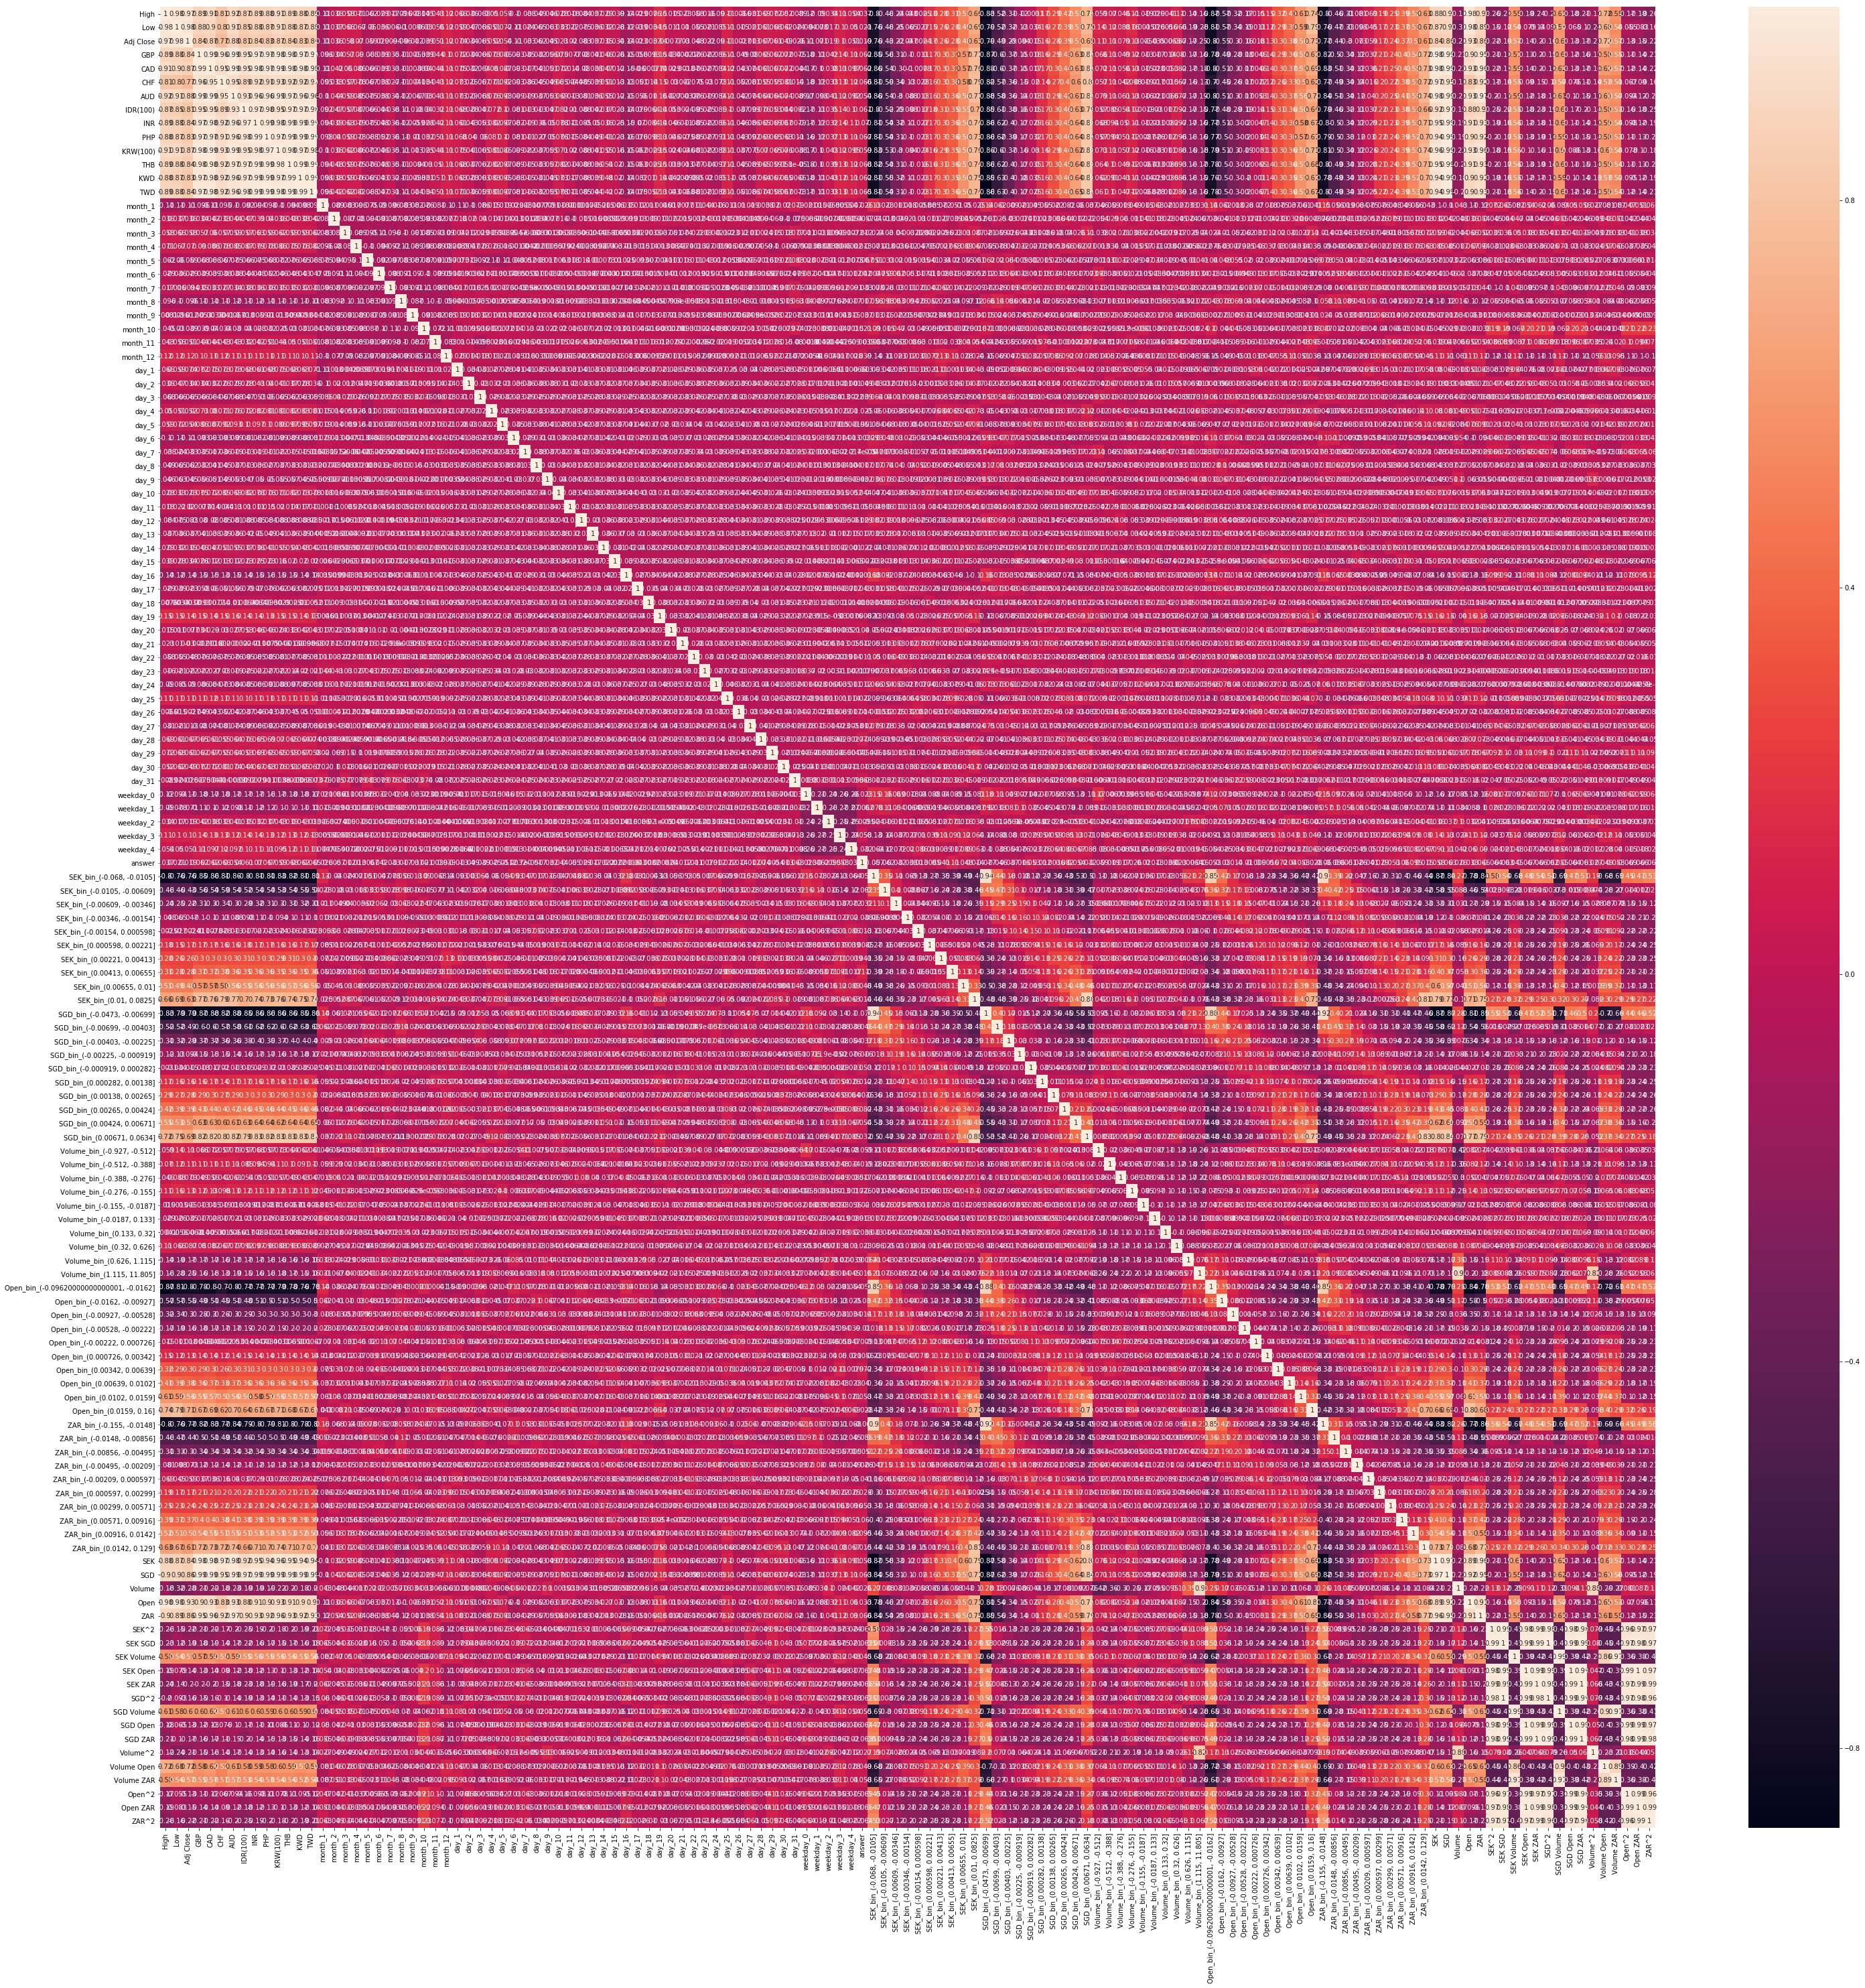

In [4]:
# 相関係数の出力
correlation_coefficient = stock_data.corr()
f, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(correlation_coefficient.corr(),annot=True)
plt.show()
## CSVへ出力
correlation_coefficient.to_csv('correlation_coefficient_v2.3.csv')

In [5]:
# 目的変数の変換
answers = stock_data['answer']
# 目的変数を削除
stock_data.drop(columns=['answer'], inplace=True)

In [6]:
# ランダムフォレストによる学習
rf =RandomForestClassifier(random_state=1)
rf.fit(stock_data, answers)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

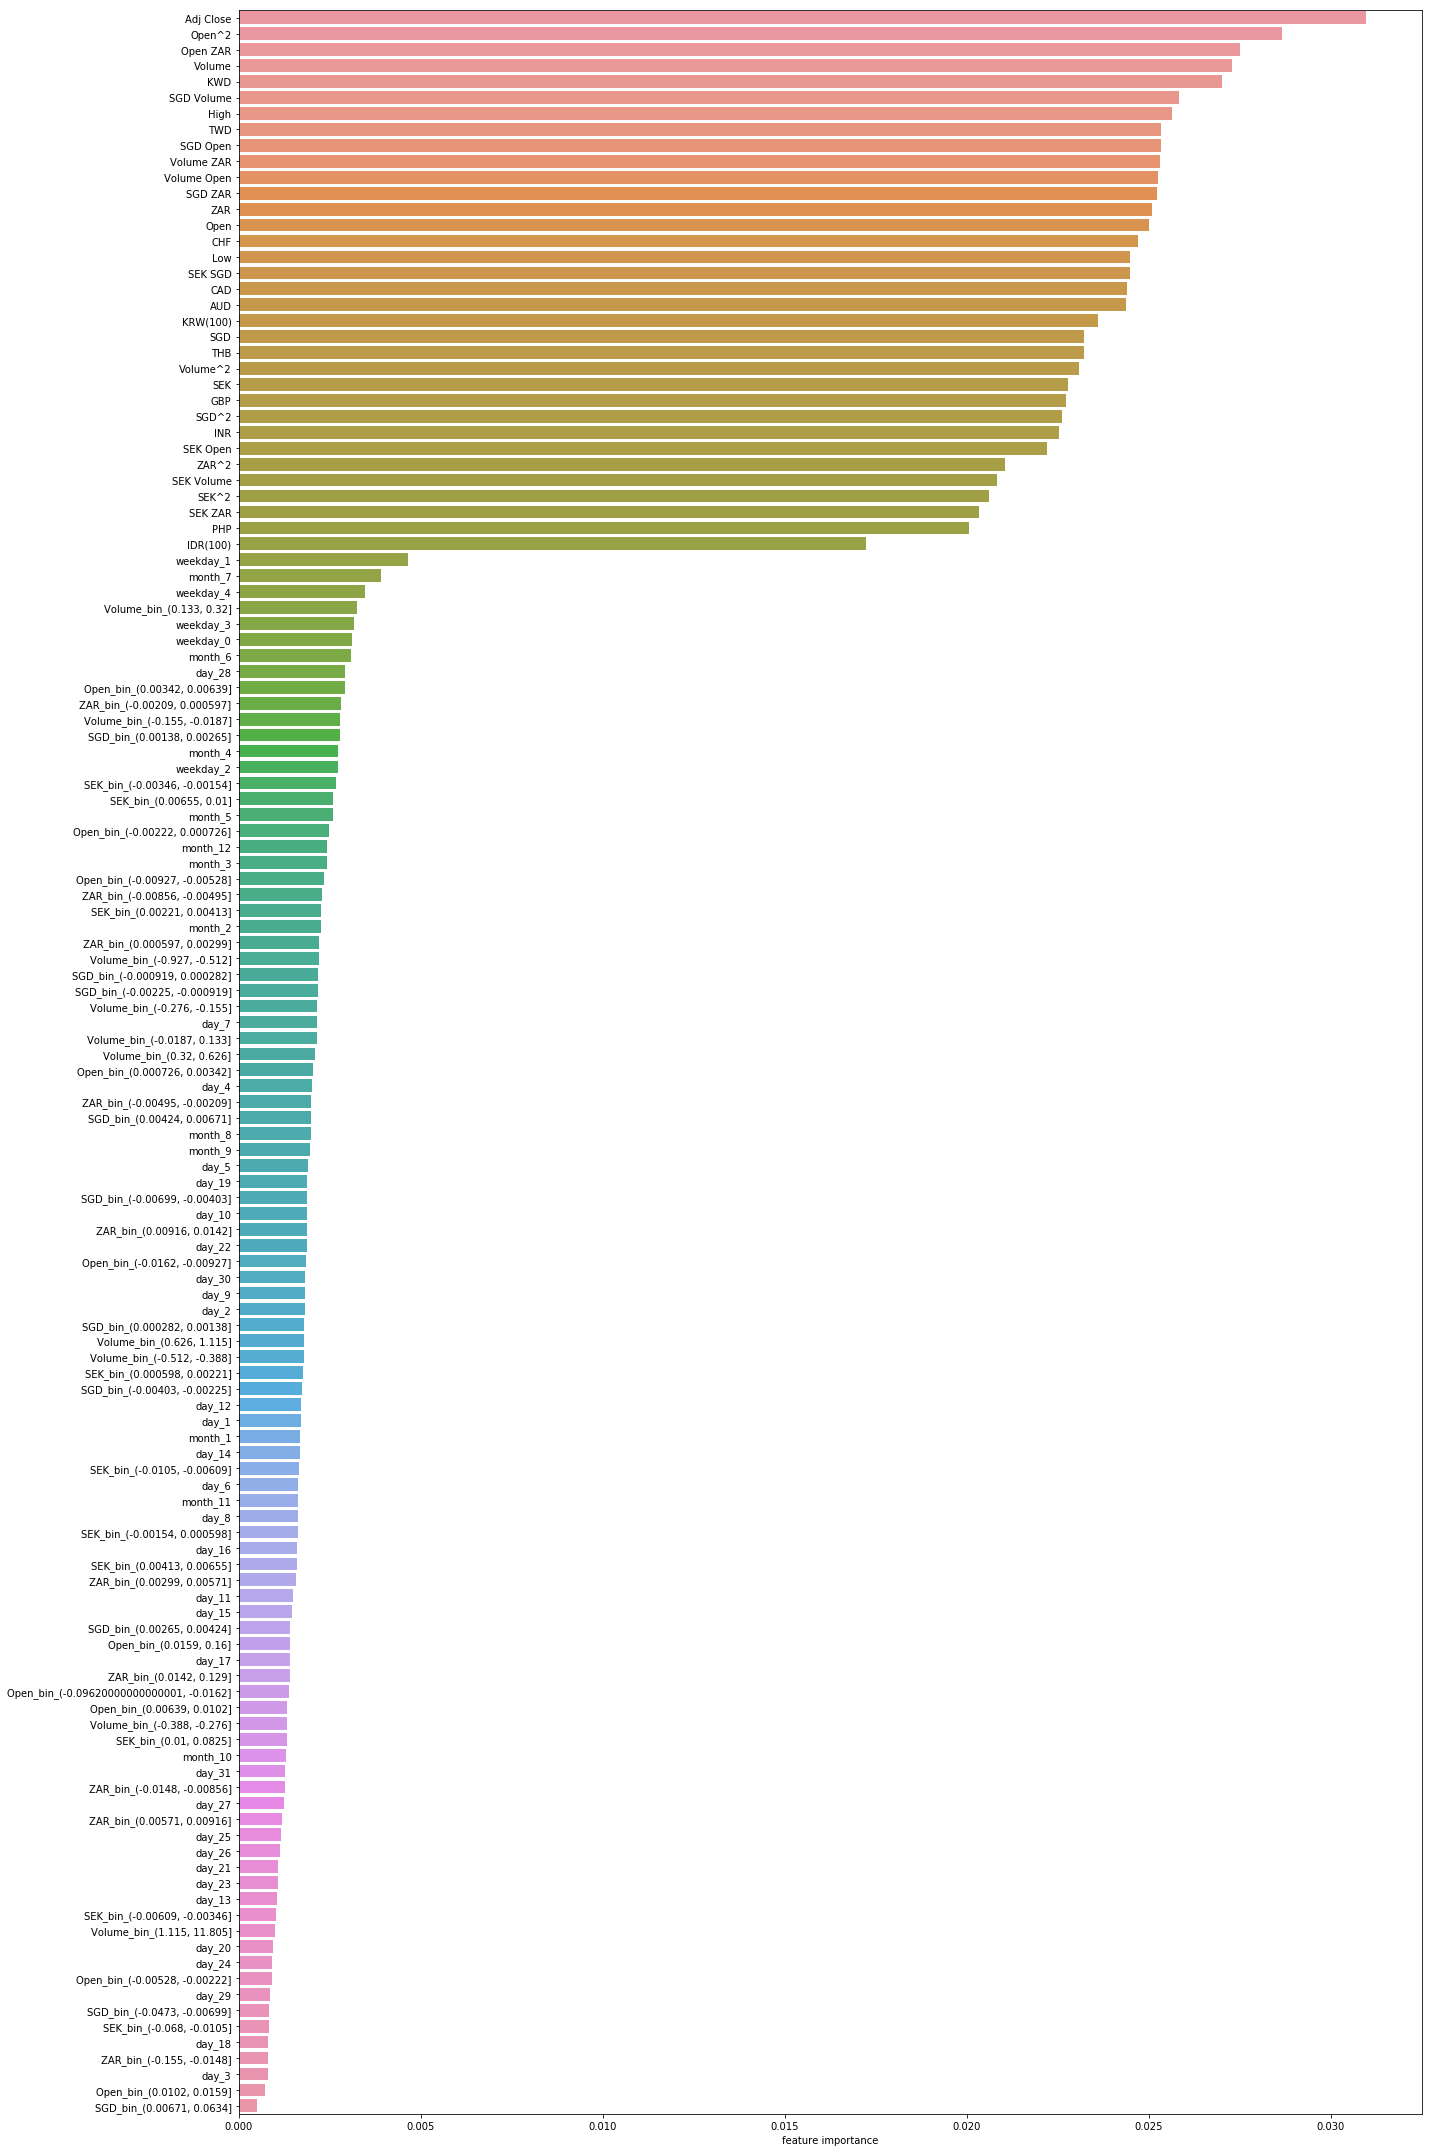

In [7]:
# 特徴量の重要度を確認
ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(20, 30))
sns.barplot(x=rf.feature_importances_[ranking], y=stock_data.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()